<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## Feature: Generate Custom Schema

In this notebook, we will explore how to generate custom schemas using VLM Run. The ability to define and generate custom schemas allows organizations to tailor data extraction to their specific needs.
This flexibility is essential for handling diverse data types and ensuring that extracted information is both relevant and actionable.

You will understand how to auto-generate schemas based on your data that can be used to extract structured information from visual content, enhancing your data processing workflows.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

### Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 39.8 MB/s eta 0:00:00


## Configure VLM Run

In [2]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


In [3]:
from vlmrun.client import VLMRun

client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

### Display testing invoice image

In [4]:
from vlmrun.common.utils import remote_image

invoice_image = remote_image("https://www.zoho.com/invoice/images/template-gallery/excel-invoice-template-1x.png")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


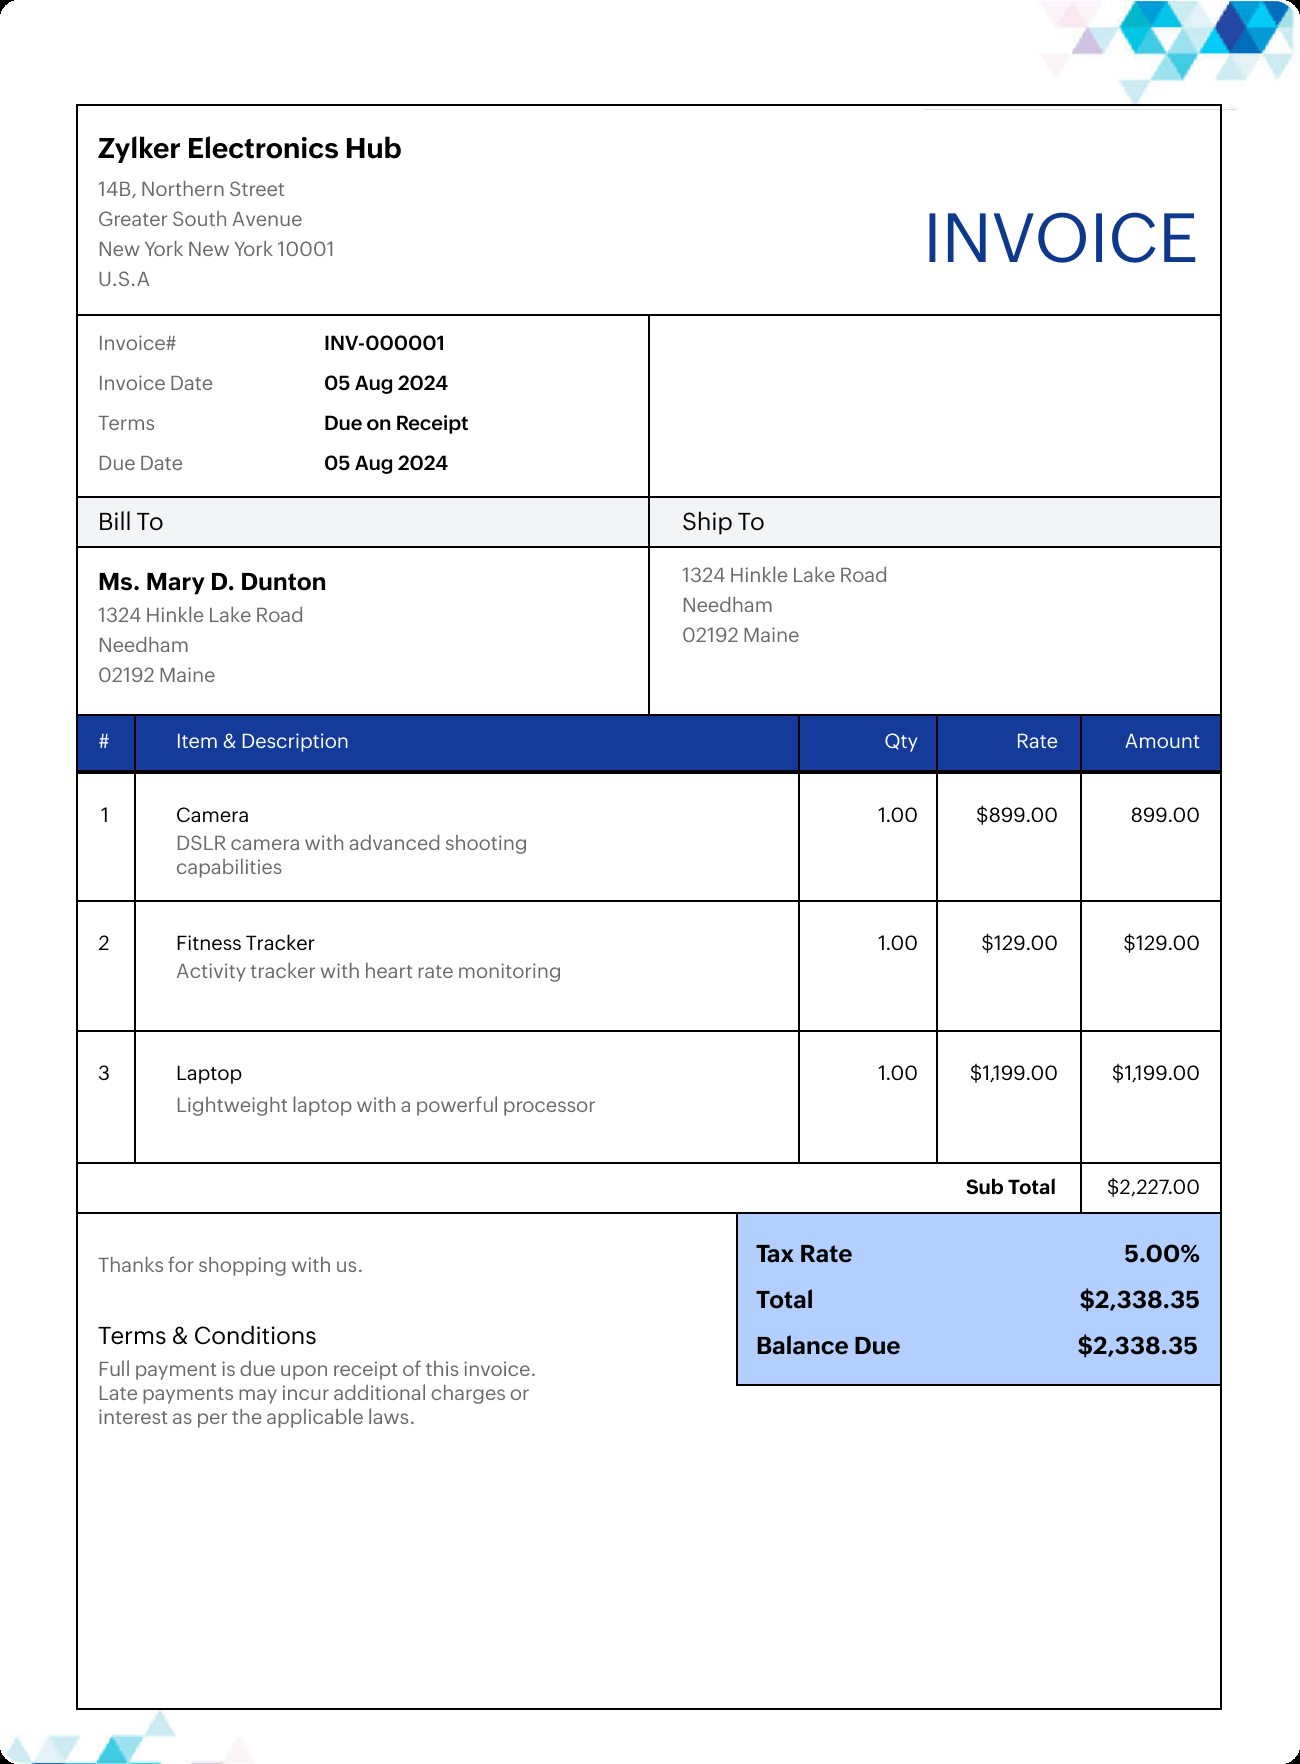

In [5]:
from IPython.display import display

display(invoice_image)

## Generate a custom schema

There's a scenario where you are receiving invoices of the similar format, you can generate schema, test and use it in ETL pipeline

In [22]:
from pydantic import BaseModel, Field
from typing import Optional

class BoundingBox(BaseModel):
    x_min: float = Field(..., description="Left coordinate (0–1 normalized)")
    y_min: float = Field(..., description="Top coordinate (0–1 normalized)")
    x_max: float = Field(..., description="Right coordinate (0–1 normalized)")
    y_max: float = Field(..., description="Bottom coordinate (0–1 normalized)")




class InvoiceField(BaseModel):
    value: str = Field(..., description="Extracted field value")
    box: Optional[BoundingBox] = Field(
        None,
        description="Approximate bounding box of the field in the image"
    )


class CustomInvoice(BaseModel):
    invoice_number: InvoiceField
    invoice_date: InvoiceField
    vendor_name: InvoiceField
    total_amount: InvoiceField
    currency: InvoiceField


In [26]:
from vlmrun.client.types import GenerationConfig

response = client.image.generate(
    images=[invoice_image],
    domain="retail.ecommerce-product-caption",
    config=GenerationConfig(
        json_schema=CustomInvoice.model_json_schema()
    )
)


In [24]:
response

PredictionResponse(id='b121ff3c-fcfd-48e8-ae44-20ece2f5af48', created_at=datetime.datetime(2025, 12, 14, 4, 27, 34, 210873), completed_at=datetime.datetime(2025, 12, 14, 4, 27, 43, 703597, tzinfo=TzInfo(0)), response={'invoice_number': {'value': 'INV-000001', 'box': {'x_min': 0.2905, 'y_min': 0.2005, 'x_max': 0.4507, 'y_max': 0.2241}}, 'invoice_date': {'value': '05 Aug 2024', 'box': {'x_min': 0.2905, 'y_min': 0.2307, 'x_max': 0.4507, 'y_max': 0.2541}}, 'vendor_name': {'value': 'Zylker Electronics Hub', 'box': {'x_min': 0.0535, 'y_min': 0.0818, 'x_max': 0.3562, 'y_max': 0.1044}}, 'total_amount': {'value': '2,338.35', 'box': {'x_min': 0.8329, 'y_min': 0.7431, 'x_max': 0.9427, 'y_max': 0.7661}}, 'currency': {'value': '$', 'box': {'x_min': 0.8329, 'y_min': 0.7431, 'x_max': 0.8443, 'y_max': 0.7661}}}, status='completed', usage=CreditUsage(elements_processed=1, element_type='image', credits_used=2), domain='retail.ecommerce-product-caption')

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)